In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns

In [2]:
path='/content/drive/MyDrive/catdog'

In [3]:
os.listdir(path)

['dogs', 'cats']

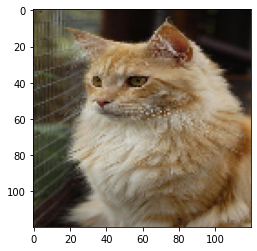

In [4]:
x=plt.imread(path+'/cats/'+os.listdir(path+'/cats/')[1])
res=cv2.resize(x,dsize=(120,120),interpolation=cv2.INTER_CUBIC)
plt.imshow(res)

In [5]:
res1=res.flatten
res

array([[[ 85,  77,  65],
        [ 98,  98,  35],
        [101,  90,  92],
        ...,
        [ 11,  10,   8],
        [ 10,   9,   7],
        [ 11,  10,   8]],

       [[ 83,  74,  69],
        [ 76,  75,  19],
        [ 80,  68,  77],
        ...,
        [ 11,  10,   8],
        [ 10,   9,   7],
        [ 11,  10,   8]],

       [[ 75,  66,  59],
        [ 71,  71,  14],
        [ 91,  79,  87],
        ...,
        [ 11,  10,   8],
        [ 10,   9,   7],
        [ 11,  10,   8]],

       ...,

       [[ 64,  54,  44],
        [ 68,  58,  49],
        [ 36,  25,  19],
        ...,
        [118,  86,  51],
        [125,  97,  63],
        [123, 100,  68]],

       [[ 68,  54,  42],
        [ 52,  39,  29],
        [ 34,  23,  16],
        ...,
        [152, 126,  96],
        [153, 132, 102],
        [160, 144, 119]],

       [[ 51,  37,  26],
        [ 45,  32,  23],
        [ 32,  23,  16],
        ...,
        [154, 136, 113],
        [171, 153, 131],
        [176, 159, 139]]

In [6]:
cnt = 0
training_label =  []
training_data = []
for animals in ['cats', 'dogs']:
  Path = f"{path}/{animals}/"
  for images in os.listdir(Path):
    image = plt.imread(Path +"/"+images)
    res = cv2.resize(image,dsize= (120,120),interpolation =cv2.INTER_CUBIC).flatten()/255
    training_data.append(res)
    training_label.append(cnt)
  cnt=cnt+ 1

In [7]:
print(training_data)

[array([0.44705882, 0.22352941, 0.00784314, ..., 0.99607843, 0.79215686,
       0.36078431]), array([0.33333333, 0.30196078, 0.25490196, ..., 0.69019608, 0.62352941,
       0.54509804]), array([0.15686275, 0.25490196, 0.28235294, ..., 0.01960784, 0.0627451 ,
       0.08627451]), array([0.38823529, 0.41176471, 0.41176471, ..., 0.09803922, 0.11764706,
       0.12941176]), array([0.        , 0.        , 0.        , ..., 0.45882353, 0.45098039,
       0.47058824]), array([0.33333333, 0.45490196, 0.14901961, ..., 0.90588235, 0.85882353,
       0.80392157]), array([0.69411765, 0.64705882, 0.68627451, ..., 0.1372549 , 0.10980392,
       0.1372549 ]), array([0.99607843, 1.        , 1.        , ..., 0.9372549 , 0.9372549 ,
       0.9372549 ]), array([0.1372549 , 0.1372549 , 0.12941176, ..., 0.16862745, 0.15294118,
       0.10980392]), array([0.45490196, 0.25882353, 0.12941176, ..., 0.99607843, 0.94117647,
       0.77254902]), array([0.19607843, 0.16078431, 0.14117647, ..., 0.48627451, 0.4313725

In [8]:
animal = {0:"cat",1:"dog"}
X=np.array(training_data,dtype = 'float')
Y=np.array(training_label,dtype = 'bool')

In [9]:
training_data=training_label=None

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3)

In [11]:
X=Y=None

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=45,C= 100.0,penalty='elasticnet',solver="saga",l1_ratio=0.5,tol=0.1)

In [13]:
model.fit(X_train,Y_train)

LogisticRegression(C=100.0, l1_ratio=0.5, penalty='elasticnet', random_state=45,
                   solver='saga', tol=0.1)

In [14]:
Y_predicted = model.predict(X_test)

In [15]:
Y_test

array([False,  True,  True, ..., False, False, False])

In [16]:
model.score(X_test,Y_test)*100

67.10229833258225

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(Y_test,Y_predicted))

              precision    recall  f1-score   support

       False       0.56      0.12      0.20       749
        True       0.68      0.95      0.79      1470

    accuracy                           0.67      2219
   macro avg       0.62      0.54      0.50      2219
weighted avg       0.64      0.67      0.59      2219

